#Clone GitHub repo into Colab

In [14]:
!git clone https://github.com/Nixis/geochem-orebody-proximity-prediction.git
%cd geochem-orebody-proximity-prediction




Cloning into 'geochem-orebody-proximity-prediction'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 92 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 255.90 KiB | 1.76 MiB/s, done.
Resolving deltas: 100% (34/34), done.
/content/geochem-orebody-proximity-prediction/geochem-orebody-proximity-prediction


#check if processed file

In [15]:
import os
os.listdir("data/processed")





['cleaned_data.csv']

#Load cleaned dataset and inspet

In [16]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("data/processed/cleaned_data.csv")

# Structural checks
print("Shape:", df.shape)

print("\nColumn types and non-null counts:")
df.info()

print("\nFirst 6 rows:")
display(df.head(6))

print("\nNumeric summary (describe):")
display(df.describe().T)

print("\nMissing values per column:")
print(df.isna().sum())


Shape: (4619, 13)

Column types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  4619 non-null   object 
 1   holeid     4619 non-null   object 
 2   from       4619 non-null   int64  
 3   to         4619 non-null   float64
 4   As         4619 non-null   float64
 5   Au         4619 non-null   float64
 6   Pb         4619 non-null   float64
 7   Fe         4619 non-null   float64
 8   Mo         4619 non-null   float64
 9   Cu         4619 non-null   float64
 10  S          4619 non-null   float64
 11  Zn         4619 non-null   float64
 12  Class      4619 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 469.2+ KB

First 6 rows:


,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
0,A04812,SOLVE003,561,571.0,9.2,0.066000,1031.00,61380.0,138.2000,3.600,3586.0000,43.6000,A
1,A03356,SOLVE003,571,581.0,9.2,0.152000,1982.00,50860.0,75.4000,4.800,1822.0000,36.4000,A
2,A04764,SOLVE003,581,591.0,9.2,0.068000,1064.80,57940.0,29.2000,3.000,740.4000,36.6000,A
3,A04626,SOLVE003,591,601.0,9.2,0.074000,891.60,48620.0,63.0000,4.200,820.8000,39.6000,A
4,A05579,SOLVE003,601,611.0,9.2,0.043125,801.25,51025.0,56.0625,4.875,745.6875,32.3125,A
5,A04316,SOLVE004,541,551.0,9.2,0.088000,2213.60,55400.0,131.2000,3.000,1963.8000,25.4000,A



Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
from,4619.0,749.785451,448.209973,71.000,411.000,641.000,991.00,2201.000
to,4619.0,759.759359,448.196573,81.000,421.000,651.000,1001.00,2211.000
As,4619.0,16.363399,30.784592,1.000,6.800,9.200,13.60,827.800
Au,4619.0,0.054297,0.088977,0.006,0.016,0.032,0.06,1.878
Pb,4619.0,689.128559,1049.779810,1.600,132.600,396.600,937.70,29793.800
Fe,4619.0,49809.084486,21512.616154,2080.000,39140.000,48900.000,58240.00,397000.000
Mo,4619.0,16.010025,39.516581,1.000,1.400,4.600,17.60,1939.400
Cu,4619.0,12.535006,108.844559,1.000,3.000,4.600,8.00,6767.000
S,4619.0,9512.363910,15135.266755,26.000,1322.000,3600.000,10810.00,217600.000
Zn,4619.0,59.117887,120.339898,5.600,29.700,38.000,52.40,3455.000



Missing values per column:
Unique_ID    0
holeid       0
from         0
to           0
As           0
Au           0
Pb           0
Fe           0
Mo           0
Cu           0
S            0
Zn           0
Class        0
dtype: int64


### Observations on Cleaned Data  

- The dataset contains **4,619 samples** with 13 columns: 8 geochemical assay variables, 2 depth indicators (`from`, `to`), identifiers (`Unique_ID`, `holeid`), and the target class (`A` or `B`).  
- All geochemical assay columns (`As, Au, Pb, Fe, Mo, Cu, S, Zn`) are now stored as numeric values (`float64`), which is suitable for statistical analysis and machine learning.  
- No missing values remain after QA/QC cleaning, ensuring the dataset is consistent.  
- Depth columns (`from`, `to`) are properly numeric (`int64` and `float64` respectively).  
- The class label and identifiers are stored as categorical (`object`) types, which is expected.  
- Some assay variables (e.g., **Pb, Fe, Cu, S**) exhibit strong skew and contain extreme outlier values (maximums much higher than the 75th percentile). These outliers may influence statistical summaries and will need careful treatment or scaling before modeling.  


In [17]:
# Class distribution
class_counts = df['Class'].value_counts()

print("Class distribution:\n", class_counts)

# Percentages
print("\nPercentages:\n", class_counts / len(df) * 100)


Class distribution:
 Class
A    2789
B    1118
?     712
Name: count, dtype: int64

Percentages:
 Class
A    60.381035
B    24.204373
?    15.414592
Name: count, dtype: float64


### Class Distribution Observations  

- The dataset contains **three types of class labels**: `A` (proximal), `B` (distal), and `?` (unlabeled / unknown).  
- **Counts**:  
  - A: 2,789 samples (~60.4%)  
  - B: 1,118 samples (~24.2%)  
  - ?: 712 samples (~15.4%)  
- **Observations**:  
  - The dataset is **imbalanced**, with a majority of samples labeled `A`.  
  - A significant portion (15.4%) of samples are currently unlabeled (`?`). These could be used as **test/unlabeled data** for predictive modeling once a classification model is trained.  
- **Implication for modeling**:  
  - Class imbalance may require **resampling techniques** (e.g., oversampling `B` or using class weights) during model training to avoid bias toward the majority class `A`.


#Step 3a — Plot histograms for all numeric assay columns

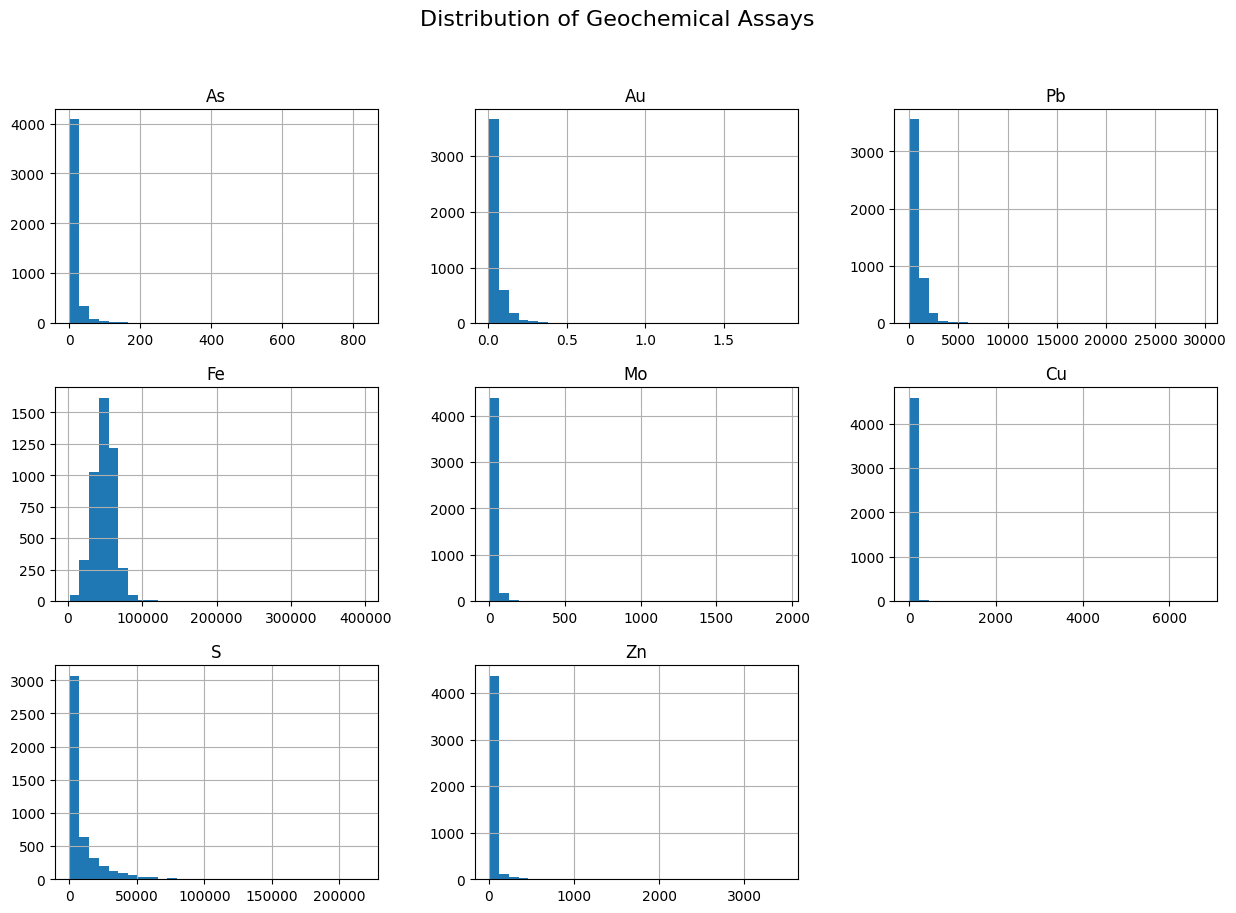

In [9]:
import matplotlib.pyplot as plt

# Numeric assay columns
assay_cols = ['As', 'Au', 'Pb', 'Fe', 'Mo', 'Cu', 'S', 'Zn']

# Plot histograms
df[assay_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Distribution of Geochemical Assays', fontsize=16)
plt.show()


## Observations on Geochemical Assay Distributions

The histograms of the geochemical assays reveal several key patterns:

### General Observations
- Most elements display **highly skewed right-tailed distributions**, where the majority of values are close to background levels and only a few samples show anomalously high concentrations.
- **Fe (Iron)** and **S (Sulfur)** show broader ranges compared to trace elements, but still exhibit skewness.
- Extreme outliers are present in several elements, which could strongly influence statistical models.

### Element-Specific Notes
- **As (Arsenic):** Strongly skewed with most values near zero; a few exceed 800 ppm.
- **Au (Gold):** Extremely skewed with nearly all values near zero; only rare assays above 1 ppm.
- **Pb (Lead):** Right-skewed with some extreme outliers >20,000 ppm, suggesting localized mineralization.
- **Fe (Iron):** Broader and more symmetric distribution, centered around tens of thousands ppm, consistent with its abundance in host rocks.
- **Mo (Molybdenum):** Heavily skewed, most values near zero, rare anomalies >500 ppm.
- **Cu (Copper):** Similar to Mo, with most assays very low and a few above several thousand ppm.
- **S (Sulfur):** Wide range with many low-to-moderate values, but anomalies can exceed 100,000 ppm, reflecting sulfide mineralization.
- **Zn (Zinc):** Skewed with most values near zero, some extending above 3,000 ppm.

### Implications for Further Analysis
- A **log transformation** (e.g., `log10(x+1)`) would help reduce skewness and improve visualization.
- **Outliers** in Pb, Cu, and S may dominate statistical models and should be examined carefully.
- Skewed distributions are **geologically meaningful**, as anomalous high values often correspond to mineralized zones or geochemical halos.


#Log Transformation

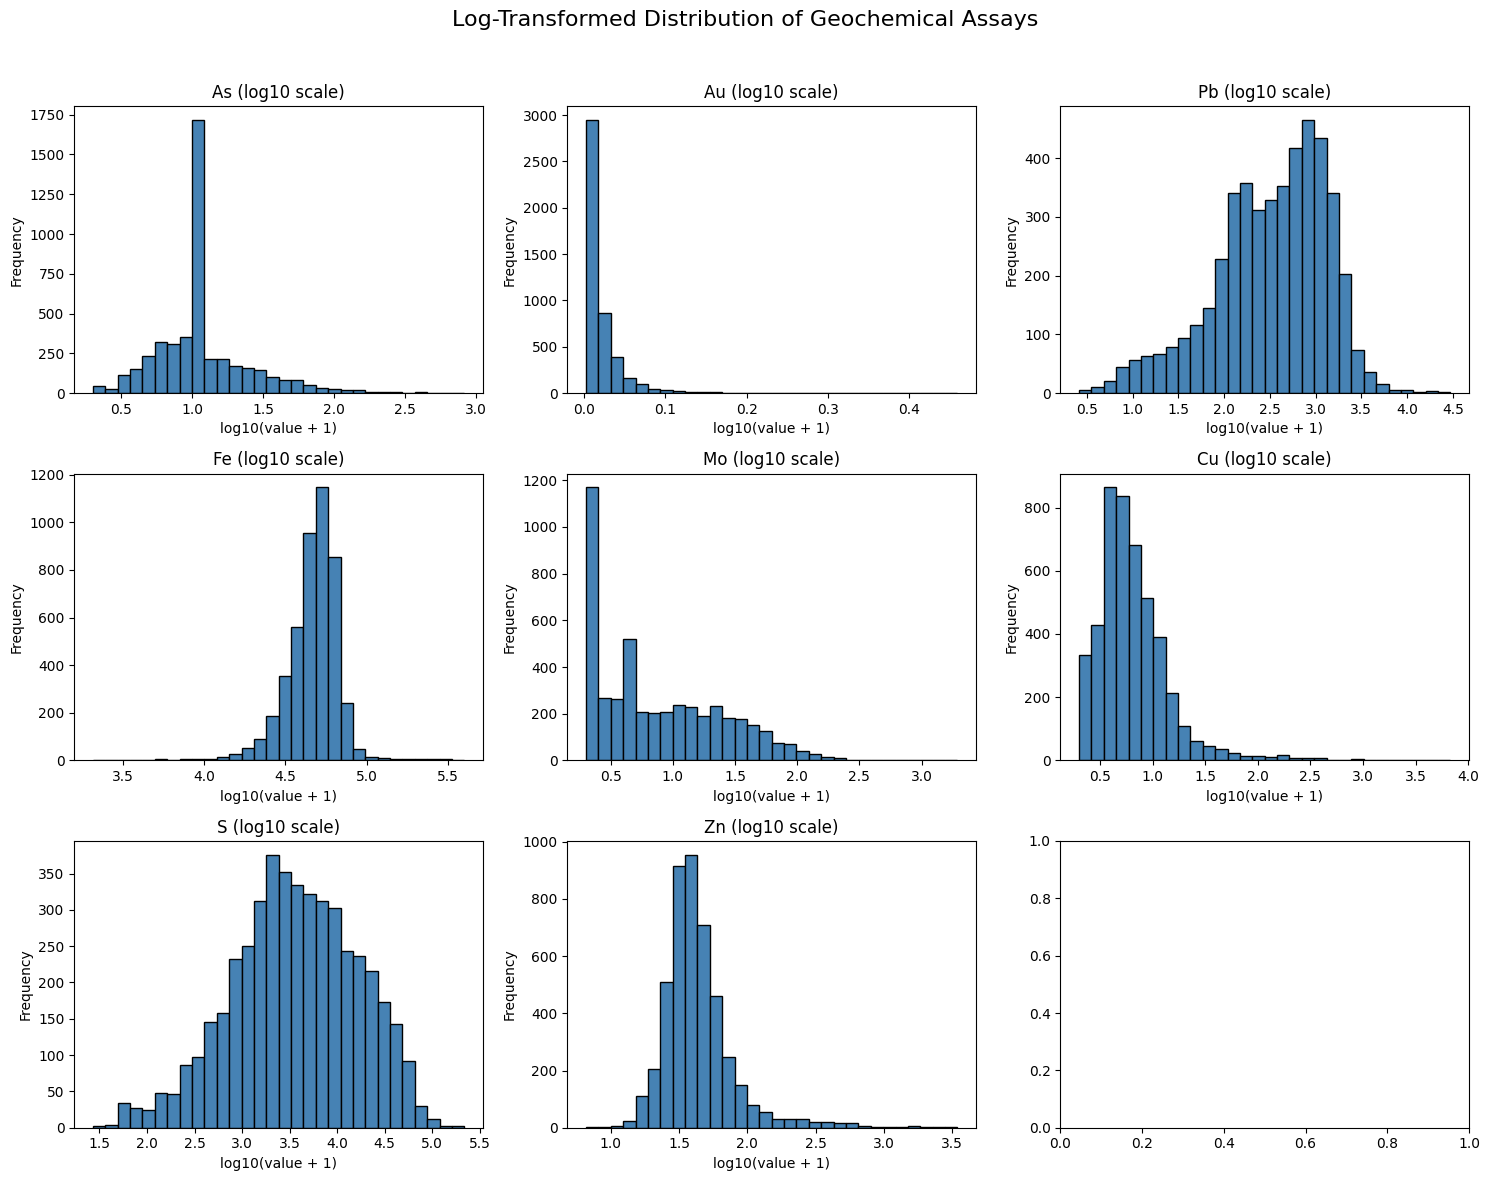

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Select the geochemical columns
elements = ["As", "Au", "Pb", "Fe", "Mo", "Cu", "S", "Zn"]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, elem in enumerate(elements):
    # Apply log10(x+1) transformation
    log_data = np.log10(df[elem] + 1)

    # Plot histogram
    axes[i].hist(log_data, bins=30, color="steelblue", edgecolor="black")
    axes[i].set_title(f"{elem} (log10 scale)")
    axes[i].set_xlabel("log10(value + 1)")
    axes[i].set_ylabel("Frequency")

# Add a main title
fig.suptitle("Log-Transformed Distribution of Geochemical Assays", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Observations

### General Effects
- The log transformation **reduced extreme skewness**, compressing outliers and spreading the bulk of data into more interpretable shapes.
- Many elements now approximate **normal or multimodal distributions**, making them more suitable for statistical modeling, clustering, or machine learning.
- Background levels and anomalous assays are now visible together, avoiding domination by extreme highs.

### Element-Specific Observations
- **As (Arsenic):** Distribution spreads across 0.5–2.5 log units, showing a main population with some higher anomalies.
- **Au (Gold):** Still highly skewed; most values cluster near detection limit, with a thin right-hand tail for anomalous assays.
- **Pb (Lead):** Shows a clearer bell-shaped distribution between log10 values 2–3.5, suggesting distinct geochemical populations.
- **Fe (Iron):** Now resembles a normal distribution centered around 4.5 log units, reflecting its role as a major element in host rocks.
- **Mo (Molybdenum):** Still right-skewed but more interpretable; majority clustered near background with a spread of anomalies.
- **Cu (Copper):** Distribution shifted into a broad hump, background values separated from anomalous highs.
- **S (Sulfur):** Appears multimodal, suggesting multiple processes (e.g., background sulfur vs. sulfide mineralization).
- **Zn (Zinc):** Distribution broadens into a near-normal shape with visible anomalies, useful for identifying mineralized zones.

### Implications for Analysis
- **Pb, S, Zn** show potential for distinguishing lithological or mineralization domains.
- **Au, Mo, Cu** remain highly skewed and will require careful handling (e.g., thresholding, robust statistics).
- Transformed data is better suited for **PCA, clustering, or supervised classification**, as scale differences and skewness have been reduced.


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Load cleaned dataset (if not already loaded)
df_cleaned = pd.read_csv("cleaned_data.csv")

# Elements and interpretive comments
elements = {
    "As": "Raw: spike near zero.\nLog: spread, background + anomalies visible.",
    "Au": "Raw: near-zero spike.\nLog: still skewed, rare highs visible.",
    "Pb": "Raw: extreme highs dominate.\nLog: bell-shaped, multiple populations.",
    "Fe": "Raw: broad, skewed.\nLog: near-normal around 4.5 log units.",
    "Mo": "Raw: mostly near zero.\nLog: skewed but anomalies clearer.",
    "Cu": "Raw: low values dominate.\nLog: broad hump, anomalies separate.",
    "S": "Raw: huge range.\nLog: multimodal, reflects different processes.",
    "Zn": "Raw: near-zero spike.\nLog: near-normal, anomalies visible."
}

# Keep only available columns
available_elements = {k: v for k, v in elements.items() if k in df_cleaned.columns}

fig, axes = plt.subplots(len(available_elements), 2, figsize=(16, 4*len(available_elements)))
fig.suptitle("Raw vs Log-Transformed Distributions of Geochemical Assays", fontsize=20, y=1.02)

# If only one element, axes won't be 2D array → wrap in list
if len(available_elements) == 1:
    axes = np.array([axes])

for i, (elem, comment) in enumerate(available_elements.items()):
    data_raw = df_cleaned[elem].dropna()
    data_log = np.log10(data_raw + 1)

    # --- Raw ---
    sns.histplot(data_raw, bins=30, kde=True, ax=axes[i, 0], color="steelblue", edgecolor="black")
    axes[i, 0].set_title(f"{elem} (Raw)")
    axes[i, 0].set_xlabel("Value")
    axes[i, 0].set_ylabel("Frequency")

    # Mean & Median lines
    axes[i, 0].axvline(data_raw.mean(), color="red", linestyle="--", label="Mean")
    axes[i, 0].axvline(data_raw.median(), color="green", linestyle="-.", label="Median")

    # Comment + stats
    comment_raw = comment.split("\n")[0]
    stats_raw = (
        f"Min: {data_raw.min():.2f}\n"
        f"Max: {data_raw.max():.2f}\n"
        f"Mean: {data_raw.mean():.2f}\n"
        f"Median: {data_raw.median():.2f}"
    )
    axes[i, 0].text(0.98, 0.95, comment_raw, transform=axes[i, 0].transAxes,
                    fontsize=9, ha="right", va="top", bbox=dict(facecolor="white", alpha=0.7))
    axes[i, 0].text(0.98, 0.80, stats_raw, transform=axes[i, 0].transAxes,
                    fontsize=8, ha="right", va="top", bbox=dict(facecolor="white", alpha=0.6))

    # --- Log ---
    sns.histplot(data_log, bins=30, kde=True, ax=axes[i, 1], color="darkorange", edgecolor="black")
    axes[i, 1].set_title(f"{elem} (Log10)")
    axes[i, 1].set_xlabel("log10(value + 1)")
    axes[i, 1].set_ylabel("Frequency")

    # Mean & Median lines
    axes[i, 1].axvline(data_log.mean(), color="red", linestyle="--", label="Mean")
    axes[i, 1].axvline(data_log.median(), color="green", linestyle="-.", label="Median")

    # Comment + stats
    comment_log = comment.split("\n")[1]
    stats_log = (
        f"Min: {data_log.min():.2f}\n"
        f"Max: {data_log.max():.2f}\n"
        f"Mean: {data_log.mean():.2f}\n"
        f"Median: {data_log.median():.2f}"
    )
    axes[i, 1].text(0.98, 0.95, comment_log, transform=axes[i, 1].transAxes,
                    fontsize=9, ha="right", va="top", bbox=dict(facecolor="white", alpha=0.7))
    axes[i, 1].text(0.98, 0.80, stats_log, transform=axes[i, 1].transAxes,
                    fontsize=8, ha="right", va="top", bbox=dict(facecolor="white", alpha=0.6))

    # Add legends
    axes[i, 0].legend(loc="upper left", fontsize=8)
    axes[i, 1].legend(loc="upper left", fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("raw_vs_log_distributions.png", dpi=300, bbox_inches="tight")
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_data.csv'

## Interpretation of Raw vs Log-Transformed Distributions

The side-by-side plots highlight the differences between **raw geochemical assay distributions** and their **log10(x+1) transformations**.

### Key Observations
- **Compression of Outliers:**  
  In the raw histograms, extreme values dominate the scale (especially Pb, Cu, S), hiding the bulk of the dataset. The log transform compresses these outliers, allowing the majority of samples to be visualized clearly.
  
- **Revealing Structure:**  
  Several elements that appeared as near-zero spikes in the raw scale (As, Au, Zn) spread into interpretable shapes on the log scale.  
  - **Pb, S, Zn** show **bell-shaped or multimodal patterns**, suggesting multiple geochemical populations (e.g., background vs mineralized).  
  - **Fe** becomes approximately normal, consistent with a major element.  
  - **Au, Mo, Cu** remain skewed but are more interpretable than before.

- **Comparability Across Elements:**  
  The log scale places elements with very different concentration ranges onto a comparable scale. This makes it easier to conduct **multivariate analysis** (e.g., PCA, clustering, or machine learning).

### Implications for Analysis
- **Modeling:** The transformed data are better suited for algorithms sensitive to skew and scale.  
- **Geological Interpretation:** Bimodal or spread distributions (Pb, S, Zn) may indicate lithological contrasts or mineralization halos, which are important exploration guides.  
- **Practical Workflow:** Raw histograms are useful to spot outliers and detection limits; log histograms are preferred for pattern recognition and statistical modeling.


In [21]:
import os
import glob

# Show current working directory
print("📂 Current working directory:", os.getcwd())

# List all CSV files in this directory
csv_files = glob.glob("*.csv")
print("\nAvailable CSV files:")
for f in csv_files:
    print(" -", f)



📂 Current working directory: /content/geochem-orebody-proximity-prediction/geochem-orebody-proximity-prediction

Available CSV files:
